In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Problem 1

#### Problem 1a) 

In [2]:
X_list =  [] 
Y_list = []
for i in np.arange(100000):
    X = random.choice([-1,0,1])
    Y = random.choice([-1,0,1])
    if X ==0:
        Y = random.choice([-1,1])
    if Y==0:
        X = random.choice([-1,1])
    X_list.append(X)
    Y_list.append(Y)
X_list = np.array(X_list)
Y_list = np.array(Y_list)

In [50]:
X_list = np.array([-1,0,1,-1,1,-1,0,1])
Y_list = np.array([1,1,1,0,0,-1,-1,-1])

In [51]:
mean(X_list*Y_list)

0.0

In [54]:
mean(Y_list)

0.0

(-1.5, 1.5)

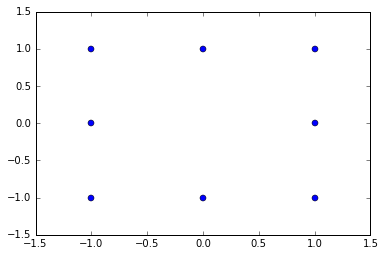

In [55]:
plt.plot(X_list,Y_list,'o')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

#### Problem 1b) 

# Problem 2 

$$N(x) = \frac{1}{\sqrt{2\pi}\sqrt{|\Sigma|}} exp \Bigg(-\frac{1}{2}(x-\mu)^T \Sigma^{-1}(x-\mu)\Bigg)$$

In [2]:
def compute_gaussian(x,y,cov,mu):
    X=np.vstack((x,y)).T
#     return 1./(sqrt(2*pi)*sqrt(np.abs(cov)))*np.exp(-0.5*np.dot((x-mu).T*np.inv(cov)*(x-mu)))
    mat_multi=np.dot((X-mu[None,...]).dot(np.linalg.inv(cov)),(X-mu[None,...]).T)
    return  np.diag(np.exp(-1*(mat_multi)))
# np.random.multivariate_normal(mu,cov)
# 1./(sqrt(2*pi)*sqrt(np.abs(cov)))*np.exp(-0.5*(x-mu).T*np.inv(cov)*(x-mu))
# print cov 
# print mu

In [3]:
from scipy.interpolate import griddata
def plot_countour(x,y,z,xmin=-5,xmax = 5,ymin=-5,ymax = 5, title=""):#,ymin=-5, ymax=5):
    xi = np.linspace(-10,10, 100)
    yi = np.linspace(-10,10, 100)
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
    levels = np.linspace(0.2,1,11)
    CS = plt.contour(xi,yi,zi,len(levels),linewidths=0.5,colors='k', levels=levels)
    CS = plt.contourf(xi,yi,zi,len(levels),cmap=cm.jet, levels=levels)
    plt.colorbar()  
    plt.title(title,fontsize = 14)
    plt.xlabel("x",fontsize = 14)
    plt.ylabel("y",fontsize = 14)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.show()

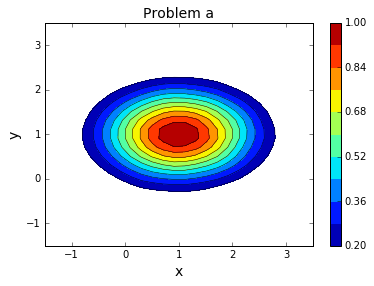

In [4]:
N=1000
cov = np.matrix([[2,0],[0,1]])
mu = np.array([1,1])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z = compute_gaussian(x,y,cov,mu)
plot_countour(x,y,z,-1.5,3.5,-1.5,3.5,title="Problem a")

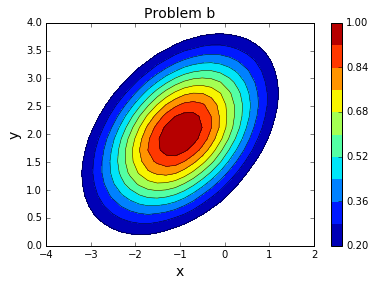

In [5]:
N=1000
cov = np.matrix([[3,1],[1,2]])
mu = np.array([-1,2])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z = compute_gaussian(x,y,cov,mu)
plot_countour(x,y,z,-4,2,0,4,title="Problem b")

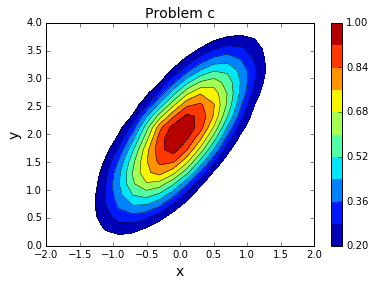

In [6]:
N=1000
cov = np.matrix([[1,1],[1,2]])
mu1 = np.array([0,2])
mu2 = np.array([2,0])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z1 = compute_gaussian(x,y,cov,mu1)
z2 = compute_gaussian(x,y,cov,mu2)
plot_countour(x,y,z1-z2,-2,2,0,4,title="Problem c")

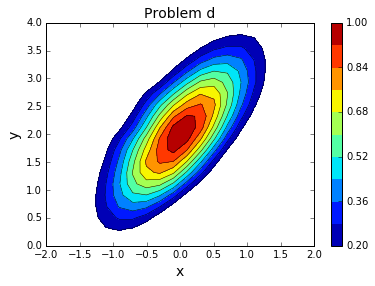

In [7]:
N=1000
cov = np.matrix([[1,1],[1,2]])
cov2 = np.matrix([[3,1],[1,2]])
mu1 = np.array([0,2])
mu2 = np.array([2,0])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z1 = compute_gaussian(x,y,cov,mu1)
z2 = compute_gaussian(x,y,cov2,mu2)
plot_countour(x,y,z1-z2,-2,2,0,4,title="Problem d")

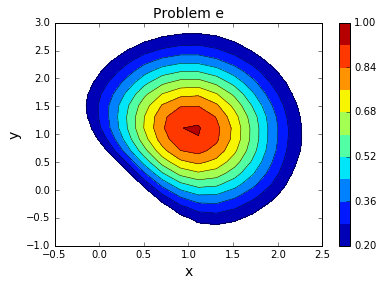

In [8]:
N=1000
cov = np.matrix([[1,0],[0,2]])
cov2 = np.matrix([[2,1],[1,2]])
mu1 = np.array([1,1])
mu2 = np.array([-1,-1])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z1 = compute_gaussian(x,y,cov,mu1)
z2 = compute_gaussian(x,y,cov2,mu2)
plot_countour(x,y,z1-z2,-0.5,2.5,-1,3,title="Problem e")

# Problem 3

#### Problem 3a ) 

In [446]:
N = 100
X1 = []
X2 = []
mu1 = 3
sig1 = sqrt(9)
mu2 = 4
sig2 = sqrt(4)
for i in np.arange(N):
    X1.append(random.normal(mu1,sig1))
for i in np.arange(N):
    X2.append(random.normal(mu2,sig2))   
X1 = np.array(X1)
X2 = 0.5*np.array(X1) +np.array(X2)

In [447]:
mu1_sample = mean(X1)
mu2_sample = mean(X2)
print "Problem 3a: The mean of the sample X1 = ",mu1_sample
print "The mean of the sample X2 = ",mu2_sample

Problem 3a: The mean of the sample X1 =  2.917726402
The mean of the sample X2 =  5.67917815055


In [448]:
#Mean vector 
mu = np.array([mu1_sample,mu2_sample])
# print mu

#### Problem 3b)

$$\Sigma = \left [ E[(X_1 - \mu_1)(X_1 - \mu_1)]  E[(X_1 - \mu_1)(X_2 - \mu_2)]  \\
\quad E[(X_2 - \mu_2)(X_1 - \mu_1)]  E[(X_2 - \mu_2)(X_2 - \mu_2)\right] $$

In [449]:
# print "Covariance matrix ="
# covmat = np.matrix([[mean((X1-mu1)*(X1-mu1)),mean((X1-mu1)*(X2-mu2))],[mean((X2-mu2)*(X1-mu1)),mean((X2-mu2)*(X2-mu2))]])
# print covmat

In [450]:
covmat = np.cov([X1,X2])
print covmat

[[ 8.43681726  4.57532718]
 [ 4.57532718  5.75749335]]


#### Problem 3c) 

In [451]:
numpy.linalg.eig(covmat)

(array([ 11.86457735,   2.32973326]), array([[ 0.80031351, -0.59958176],
        [ 0.59958176,  0.80031351]]))

In [452]:
eigenvalue =  numpy.linalg.eig(covmat)[0]
eigenvector =  numpy.linalg.eig(covmat)[1]

In [453]:
print "Eigenvalue: " , eigenvalue
print "Eigenvector: " , eigenvector[0] ,"and" , eigenvector[1]

Eigenvalue:  [ 11.86457735   2.32973326]
Eigenvector:  [ 0.80031351 -0.59958176] and [ 0.59958176  0.80031351]


#### Problem 3d) 

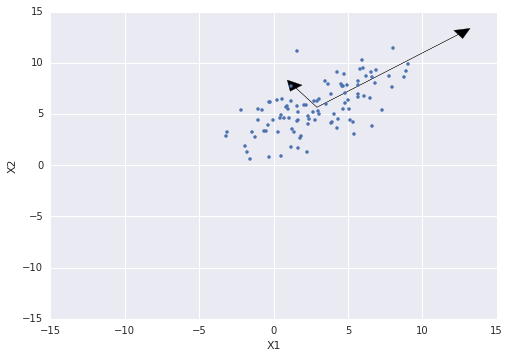

In [457]:
import seaborn 
fig, ax = plt.subplots()
plt.plot(X1,X2,'.')
plt.xlim(-15,15)
plt.ylim(-15,15) 
dr =  eigenvalue[1] * np.array(eigenvector[0])
dr2 =  eigenvalue[0] * np.array(eigenvector[1])
ax.arrow(mu1_sample, mu2_sample, dr[1], dr[0], head_width=1, head_length=1,fc='k')#, fc='k', ec='k')
ax.arrow(mu1_sample, mu2_sample, dr2[1], dr2[0], head_width=1, head_length=1,fc='k')#, fc='k', ec='k')
plt.xlabel("X1")
plt.ylabel("X2")

Problem 3 e) 

(-15, 15)

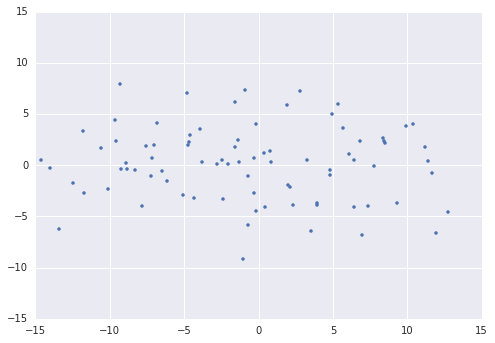

In [352]:
newX12 = np.dot(eigenvector.T,(X1-mu[0], X2-mu[1]))
plt.plot(newX12[0,:],newX12[1,:],'.')
plt.xlim(-15,15)
plt.ylim(-15,15)

# Problem 4

# Problem 5

Please hold out 10,000 points from the training set for validation. Rather than training on 60,000 points at the max, train on 50,000. Report error rates on the 10,000 point training set, similar to HW1. 

#### Problem 5 a) , c) 

In [8]:
import scipy.io
from sklearn import svm
from sklearn import metrics
DEBUG=False
digit_data_test = scipy.io.loadmat("data/digit_dataset/test.mat")
digit_data_train = scipy.io.loadmat("data/digit_dataset/train.mat")

test_img= digit_data_test['test_images']
train_img= digit_data_train['train_images']
train_label= digit_data_train['train_labels']
#Flatten the image into 784 pixel long vector 
train_img_flat=[]
for i in np.arange(shape(train_img)[2]):
    train_img_flat.append(train_img[:,:,i].flatten())
train_img_flat1= np.array(train_img_flat)

#get a list of 10100 unique random numbers for indexing 
N=10000
num_verification = 10000
s = set()
while len(s) < N+num_verification:
    s.add(random.randint(60000))
rand_idx=np.array(list(s))
np.random.shuffle(rand_idx)

train_subset = []
labels_subset = []
for i in rand_idx[:N]:
    train_subset.append(train_img_flat[i])
    labels_subset.append(train_label[:,0][i])
train_subset = np.array(train_subset)
labels_subset = np.array(labels_subset)


In [9]:
def montage_images(images):
    num_images=min(1000,np.size(images,2))
    numrows=math.floor(math.sqrt(num_images))
    numcols=math.ceil(num_images/numrows)
    img=np.zeros((numrows*28,numcols*28));
    for k in range(num_images):
        r = k % numrows
        c = k // numrows
        img[r*28:(r+1)*28,c*28:(c+1)*28]=images[:,:,k];
    return img

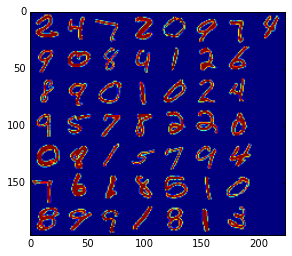

In [10]:
plt.imshow(montage_images(train_subset.T.reshape((28,28,N))[:,:,:50]))

Normalizing the image by dividing by L2 norm: 
$$    L2  = \sqrt{\sum |x_k|}$$

In [48]:
# np.linalg.norm(img,2)

In [49]:
# sqrt(sum(img**2))

In [50]:
len(np.where(train_subset_normalized>1)[0])

1106048

In [51]:
train_subset_normalized = []
for i in np.arange(N):
    img = train_subset[i,:]
    L2 =sqrt(sum(img**2))
    train_subset_normalized.append(img/L2)
train_subset_normalized = np.array(train_subset_normalized)

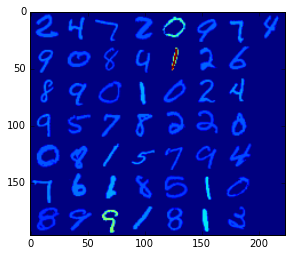

In [52]:
plt.imshow(montage_images(train_subset_normalized.T.reshape((28,28,N))[:,:,:50]))

Using MLE, we find that the best fit parameters for Gaussian pdf is $\hat{\mu} =$ sample mean and $\hat{\sigma}^2 =$ sample variance. 

For each digit class, we select the images that are labelled for that class then we compute the covariance 

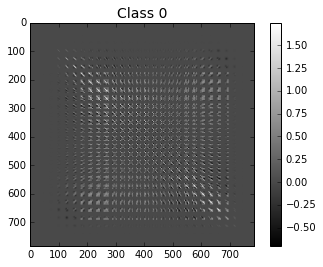

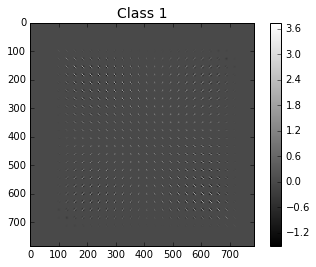

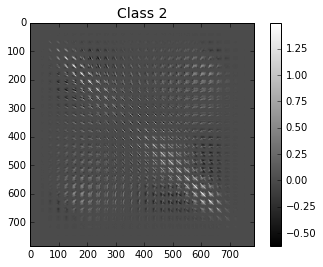

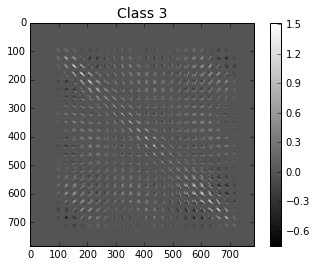

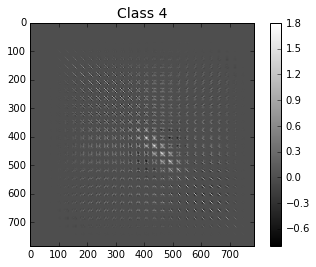

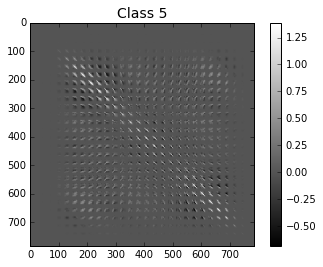

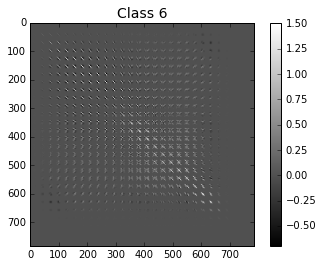

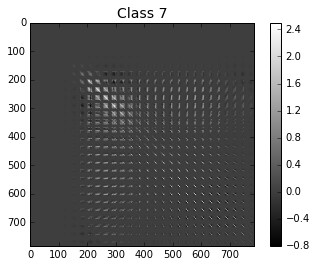

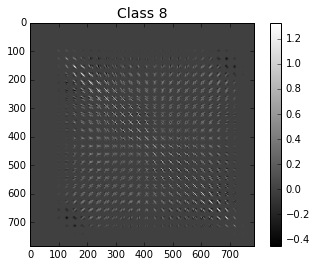

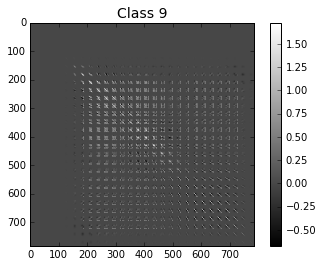

In [53]:
if DEBUG: shape(np.sum(train_subset_normalized[idx],axis=0))
covmat_list = []
mvec_list = []
for i in np.arange(10):
    plt.figure()
#     print "For digit class ", i ," : "
    idx  = np.where(labels_subset==i)[0]
    dat = train_subset_normalized[idx].T
    mvec = np.array(np.sum(train_subset_normalized[idx],axis=0)/shape(dat)[1])
#     print mvec
    covmat = np.cov(dat)
    plt.imshow(covmat,cmap = cm.gray)
    plt.title("Class {}".format(i),fontsize=14)
    plt.colorbar()
    covmat_list.append(covmat)
    mvec_list.append(mvec)

The covariance matrix is a 784x784 matrix as 784 is the number of features.
The elements along the diagonal are the $E[X_n,X_n]$ elements, these are simply the variance of the feature. (e.g. $E[X_8,X_8]$ at pixel 35 on every image, what is the variance that this is a digit 8) The nondiagonal elements are the ones that the covariance, what is the variance that even though this is a feature digit 4 but looks like feature digit 8. This makes sense if we examine the matrix of Class 7, since our image is flatterned as a long vector and we start writing from left-to-right, top-to-bottom. We find that  for seven we have low variance to start off with because people may start of writing their 7s very differently but most of them end with a straight line so they are quite simmilar.

- can we assume LDA? (all the variance for each class is the same)

#### Problem 5b) 

Estimating prior for QDA :
$$ \hat{\pi_c} = \frac{n_c}{\sum_D n_D}$$

From the labels we know the number of digits that is classified as a certain class

In [8]:
prior_list = []
for c in np.arange(10):
    denom = len(labels_subset)
    n_c  = len(np.where(labels_subset==c)[0])
    prior = n_c / float(denom)
    prior_list.append(prior)
    print "Prior for Class ", c,":",prior

Prior for Class  0 : 0.1005
Prior for Class  1 : 0.1065
Prior for Class  2 : 0.099
Prior for Class  3 : 0.1001
Prior for Class  4 : 0.0958
Prior for Class  5 : 0.0917
Prior for Class  6 : 0.0989
Prior for Class  7 : 0.1084
Prior for Class  8 : 0.0986
Prior for Class  9 : 0.1005


These probabilities make sense because they are close to 1/9 (assuming equal occurence), but they are sampled randomly (not uniformly) in the MNIST dataset so it is something around that value

In [9]:
1/9.

0.1111111111111111

Check that the probability adds up to 1 

In [10]:
sum(prior_list)==1.0

True

#### Problem 3d) 

In [17]:
from sklearn.lda import LDA

##### i) 

In [28]:
avrg_covmat = np.array(np.sum(covmat_list,axis=0)/shape(covmat_list)[0])    

Since we are assuming that the covariance is the same, this is a linear discriminant analysis problem

In [22]:
lda = LDA(priors= prior_list,n_components=10)

In [33]:
type(train_subset_normalized)

numpy.ndarray

In [32]:
type(labels_subset)

numpy.ndarray

In [37]:
lda.fit(train_subset_normalized.astype(float),labels_subset.astype(float) )

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
lda

# Problem 6

In [369]:
housing_data_test = scipy.io.loadmat("data/housing_dataset/housing_data.mat")
Xtrain= housing_data_test['Xtrain']
Xvalidate= housing_data_test['Xvalidate']
Ytrain= housing_data_test['Ytrain']
Yvalidate= housing_data_test['Yvalidate']

Using Maximum log likelihood estimation, we get the least square fit function  that we want to minimize over: 

$$\sum^N_{i=1} [y_i - y(x_i; a_1...a_M)]^2$$

where a1...aM is the parameter, in our case of the linear fit it will simply be parameters a,b from the model $y=ax+b$
and $x_i$ is the datapoints and $y_i$ is the training data points

But since our housing data has 8 dimensions, we want to generalize this into 8+1 dimensions (+1 because of the constant term ($i$) ), so our linear model should instead look like: 
$$y = ax_{1i}+bx_{2i}+cx_{3i}+dx_{4i}+ex_{5i}+fx_{6i}+gx_{7i}+hx_{8i}+i = \mathbf{w^T} \mathbf{x}$$

where $x = [x_1...x_8]$ and $\mathbf{w} = [a,...,h,i]$

Minimizing sum of squares residual : 
    $$\sum^N_{i=1} [y_i - y(x_i; a_1...a_M)]^2 = (\mathbf{Y}-\mathbf{Xw})^T (\mathbf{Y}-\mathbf{Xw}) $$

Linear regression has the closed form solution that we obtained in HW 1 : 


$$\mathbf{w}=(\mathbf{X^T \Lambda X})^{-1}(\mathbf{X^T\Lambda Y} )$$

In [394]:
print shape(Xtrain)
print shape(Xvalidate)
print shape(Ytrain[:,0])
print shape(Yvalidate)

(19440, 8)
(1200, 8)
(19440,)
(1200, 1)


In [395]:
x = Xtrain
#adding bias term 
x =np.insert(x,8,np.ones(shape(x)[0]),axis=1)
y = np.ndarray.astype(Ytrain[:,0],dtype=float)
# def objective(a,b,c,d,e,f,g,h,i):#,x,y):
#     return sum((y-(a*x[:,0]+b*x[:,1]+c*x[:,2]+d*x[:,3]+e*x[:,4]+f*x[:,5]+g*x[:,6]+h*x[:,7]+i))**2)
def objective(w):
    return sum((y-np.dot(x,w)).T*(y-np.dot(x,w)))

In [410]:
polyfit(X,1)

In [408]:
initial_guess = np.array([1,1,1,1,1,1,1,1,1])
objective(initial_guess)#,Xtrain,np.ndarray.astype(Ytrain[:,0],dtype=float))

1049758203337738.4

what's a good initial guess? 

In [401]:
fit  = scipy.optimize.minimize(objective,initial_guess)
weights = fit['x']

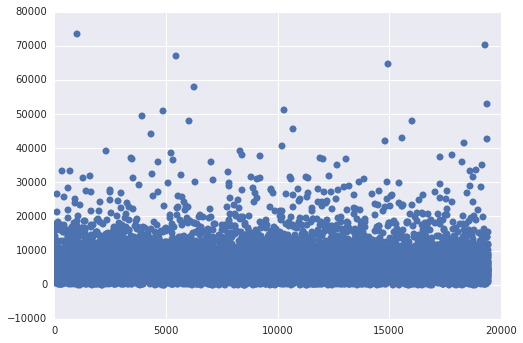

In [413]:
plt.plot(np.dot(x,weights),'o')

##References: 
- "Pylab_examples Example Code: Arrow_demo.py." Pylab_examples Example Code: Arrow_demo.py â€” Matplotlib 1.5.1 Documentation. N.p., n.d. Web. 21 Feb. 2016.
- "Matplotlib: Making 2D Gaussian Contours with Transparent Outermost Layer." _Python_. N.p., n.d. Web. 21 Feb. 2016.
- "Covariance Matrix." _Wikipedia_. Wikimedia Foundation, n.d. Web. 21 Feb. 2016.
- Raschka, Sebastian. "Linear Discriminant Analysis Bit by Bit." _Linear Discriminant Analysis Bit by Bit_. N.p., n.d. Web. 22 Feb. 2016.

In [20]:
from sklearn.qda import QDA 

In [ ]:
QDA()